# Model for the demand of shared bikes - BoomBikes company

#### Problem Statement:

required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes

- How well those variables describe the bike demands

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [87]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [88]:
import numpy as np
import pandas as pd

In [89]:
bike = pd.read_csv("day.csv")

In [90]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [91]:
bike.shape

(730, 16)

In [92]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [93]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [94]:
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [95]:
# Some variables are unnecessary and needs to be modified

## Step 2: Visualising the Data

- Dropping and updating unnecessary and irrelevant columns.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [96]:
# Variables to be dropped - instant,atemp as it is irrelevant and redundant.
# season and weathersit to be updated as categorical.

In [97]:
bike.drop(['instant','atemp'],axis=1,inplace=True)

In [98]:
# Removing casual and registered as these are not needed as target.
bike.drop(['casual','registered'],axis=1,inplace=True)

In [99]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

bike['season'] = bike['season'].map(season_mapping)

In [100]:
# weathersit : 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

weather_mapping = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

bike['weathersit'] = bike['weathersit'].map(weather_mapping)

In [101]:
# Converting date to Pandas datetime format
bike['dteday'] = pd.to_datetime(bike['dteday'])

In [102]:
# Deriving "days since recorded"
from datetime import date

d0 = pd.Timestamp('2017-12-31 00:00:00', tz=None)
#d0 = date(2017, 2, 28)
d1 = bike.dteday

print(type(d0))
print(type(d1[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [103]:
delta = d1 - d0
bike['day']= delta

In [104]:
# Cleaning days
bike['day'] = bike['day'].astype(str)
bike['day'] = bike['day'].map(lambda x: x[0:2])
bike['day'] = bike['day'].astype(int)

In [105]:
bike.head(20)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,2018-01-01,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1
1,2018-02-01,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,32
2,2018-03-01,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,60
3,2018-04-01,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,91
4,2018-05-01,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,12
5,2018-06-01,spring,0,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.378268,51.8261,6.000868,1606,15
6,2018-07-01,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8.057402,49.8696,11.304642,1510,18
7,2018-08-01,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",6.765000,53.5833,17.875868,959,21
8,2018-09-01,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",5.671653,43.4167,24.250650,822,24
9,2018-10-01,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",6.184153,48.2917,14.958889,1321,27


In [106]:
bike.drop(['dteday'],axis=1,inplace=True)

In [107]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1
1,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,32
2,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,60
3,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,91
4,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,12
5,spring,0,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.378268,51.8261,6.000868,1606,15
6,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",8.057402,49.8696,11.304642,1510,18
7,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",6.765000,53.5833,17.875868,959,21
8,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",5.671653,43.4167,24.250650,822,24
9,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",6.184153,48.2917,14.958889,1321,27


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='day', ylabel='cnt'>

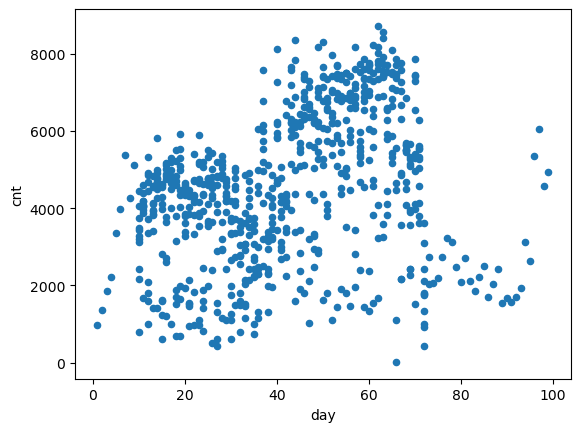

In [109]:
# days vs cnt
bike.plot.scatter(x='day', y='cnt')

In [110]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 68.6+ KB


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [ ]:
sns.pairplot(bike)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

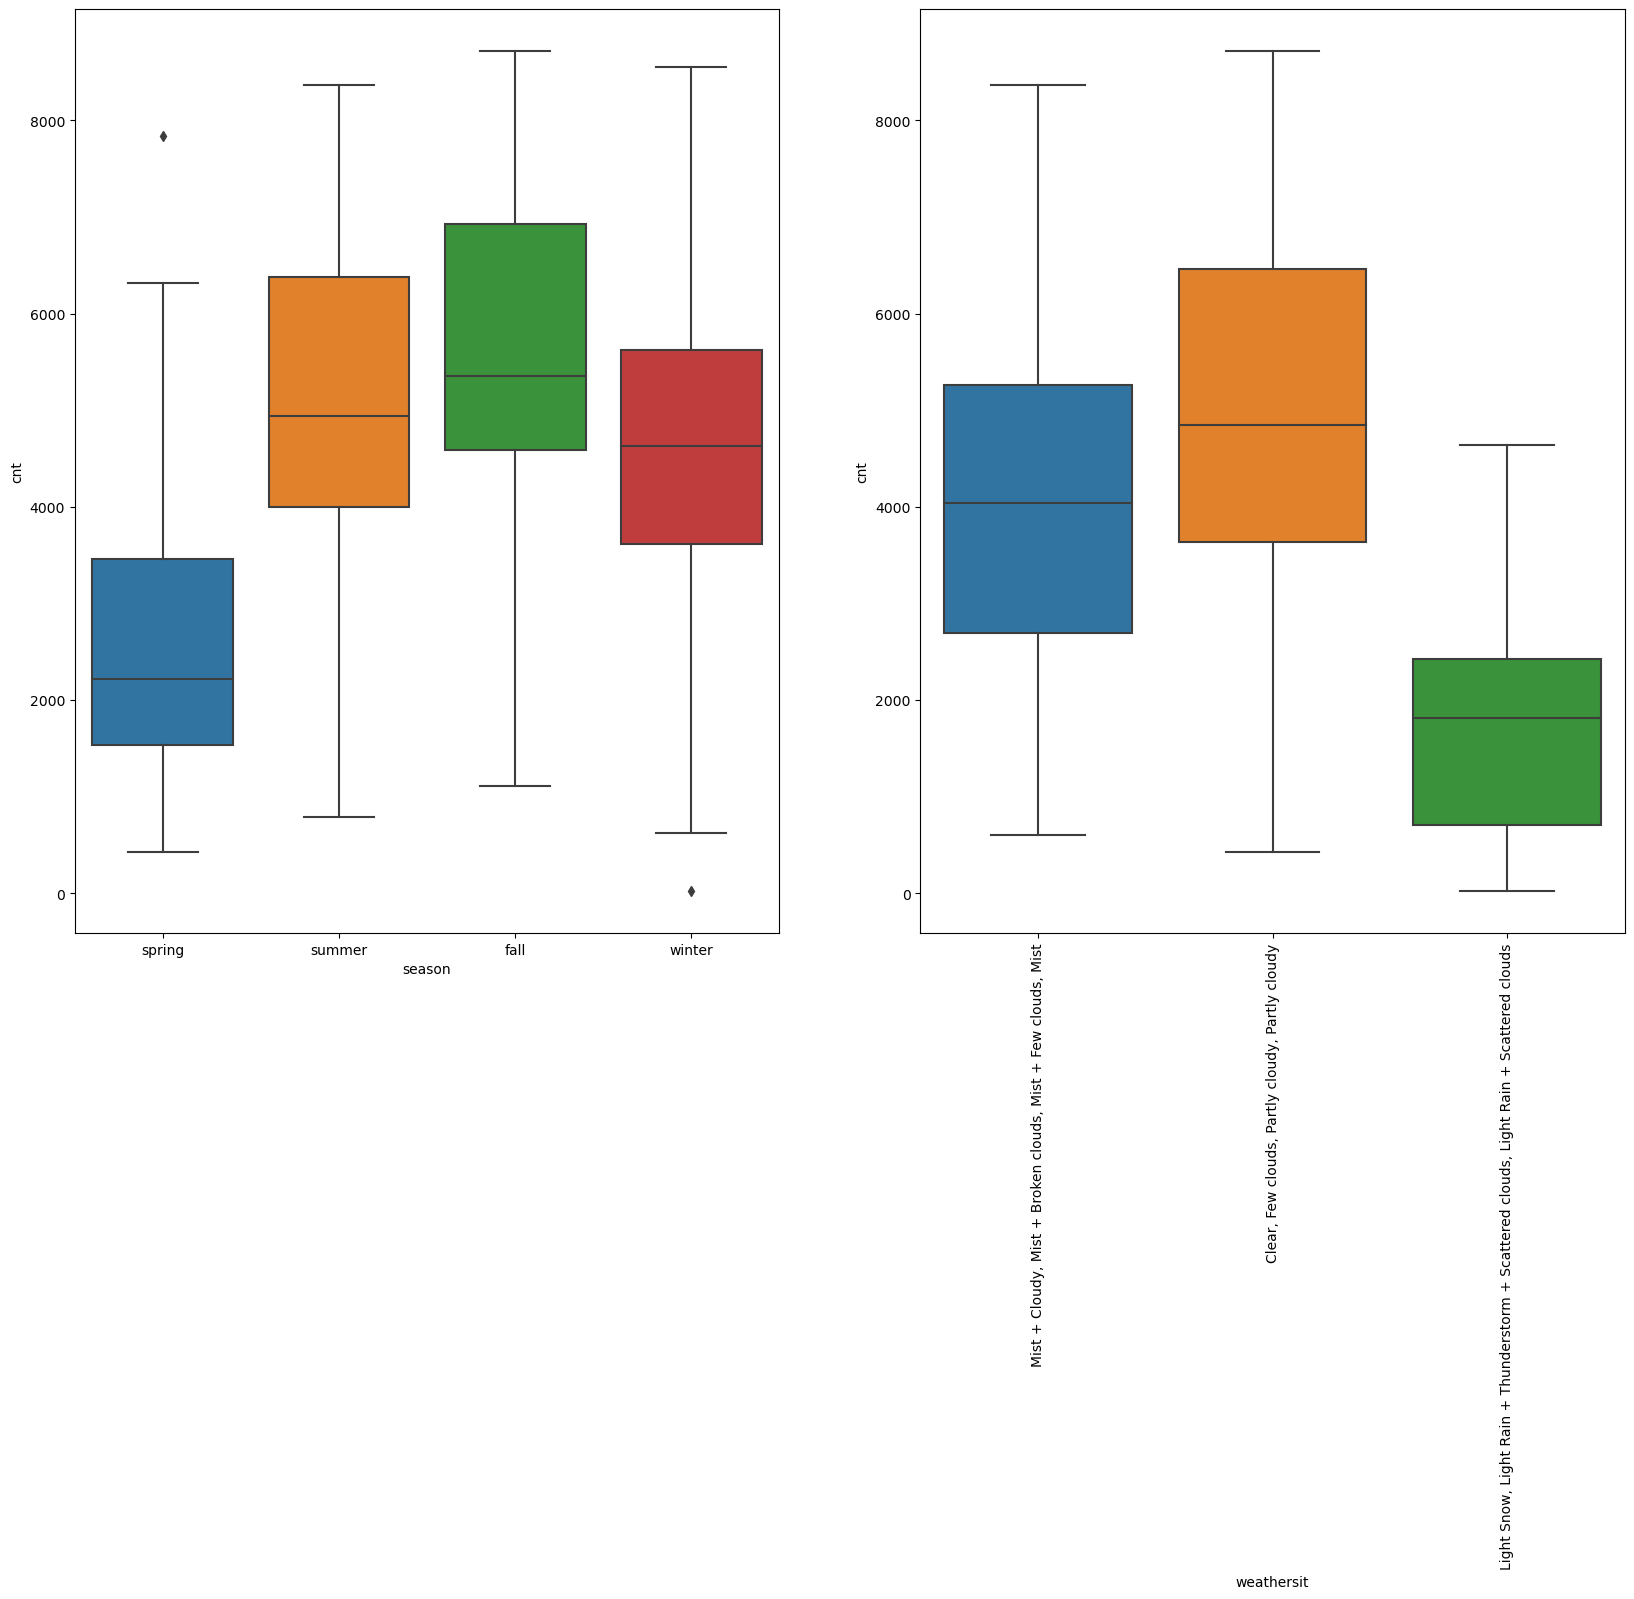

In [112]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

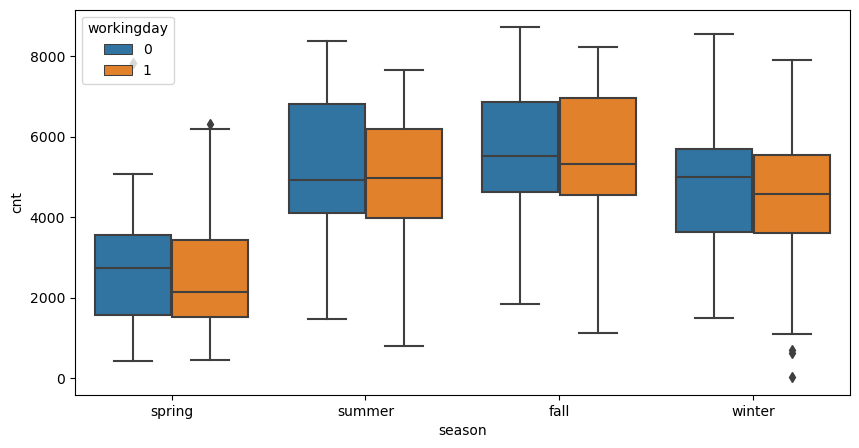

In [113]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bike)
plt.show()

## Step 3: Data Preparation

- Assigning dummy variables to categorical fields

### Dummy Variables

The variable `season` has 4 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [114]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_val' , dropping redundant
season_val = pd.get_dummies(bike['season'] , drop_first = True)

In [115]:
# Check what the dataset 'status' looks like
season_val.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [116]:
# Add the results to the original housing dataframe

bike = pd.concat([bike, season_val], axis = 1)

In [117]:
# Now let's see the head of our dataframe.

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter
0,spring,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,1,0,0
1,spring,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,32,1,0,0
2,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,60,1,0,0
3,spring,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,91,1,0,0
4,spring,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,12,1,0,0


In [118]:
# Drop 'furnishingstatus' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [119]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day,spring,summer,winter
0,0,1,0,1,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,1,0,0
1,0,1,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,32,1,0,0
2,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,60,1,0,0
3,0,1,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,91,1,0,0
4,0,1,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,12,1,0,0


In [120]:
# doing same for weather sit

In [121]:
weathersit_val = pd.get_dummies(bike['weathersit'] , drop_first = True)

In [122]:
weathersit_val.head()

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [123]:
bike = pd.concat([bike, weathersit_val], axis = 1)

In [124]:
bike.drop(['weathersit'], axis = 1, inplace = True)

In [125]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,1,1,0,0,0,1
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,32,1,0,0,0,1
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,60,1,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,91,1,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,12,1,0,0,0,0


In [126]:
#renaming cols - Challenging_weather , Favorable_weather
bike.rename(columns={'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds': 'Challenging_weather',
                    'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' : 'Favorable_weather'}, inplace=True)

In [127]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,Challenging_weather,Favorable_weather
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,1,1,0,0,0,1
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,32,1,0,0,0,1
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,60,1,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,91,1,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,12,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [128]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,Challenging_weather,Favorable_weather
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,1,1,0,0,0,1
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,32,1,0,0,0,1
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,60,1,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,91,1,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,12,1,0,0,0,0


In [132]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt','day']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [133]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,Challenging_weather,Favorable_weather
653,1,0.818182,0,0.500000,1,0.509887,0.575354,0.300794,0.864243,0.653061,0,0,1,0,0
576,1,0.545455,0,0.500000,1,0.815169,0.725633,0.264686,0.827658,0.571429,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.640189,0.255342,0.465255,0.418367,1,0,0,0,1
728,1,1.000000,0,0.166667,1,0.245101,0.498067,0.663106,0.204096,0.724490,1,0,0,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.504508,0.188475,0.482973,0.479592,0,1,0,0,1


In [134]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,day,spring,summer,winter,Challenging_weather,Favorable_weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.650369,0.320768,0.513620,0.429392,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.145882,0.169797,0.224593,0.206643,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.538643,0.199179,0.356420,0.265306,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.653714,0.296763,0.518638,0.428571,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.754830,0.414447,0.684710,0.599490,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


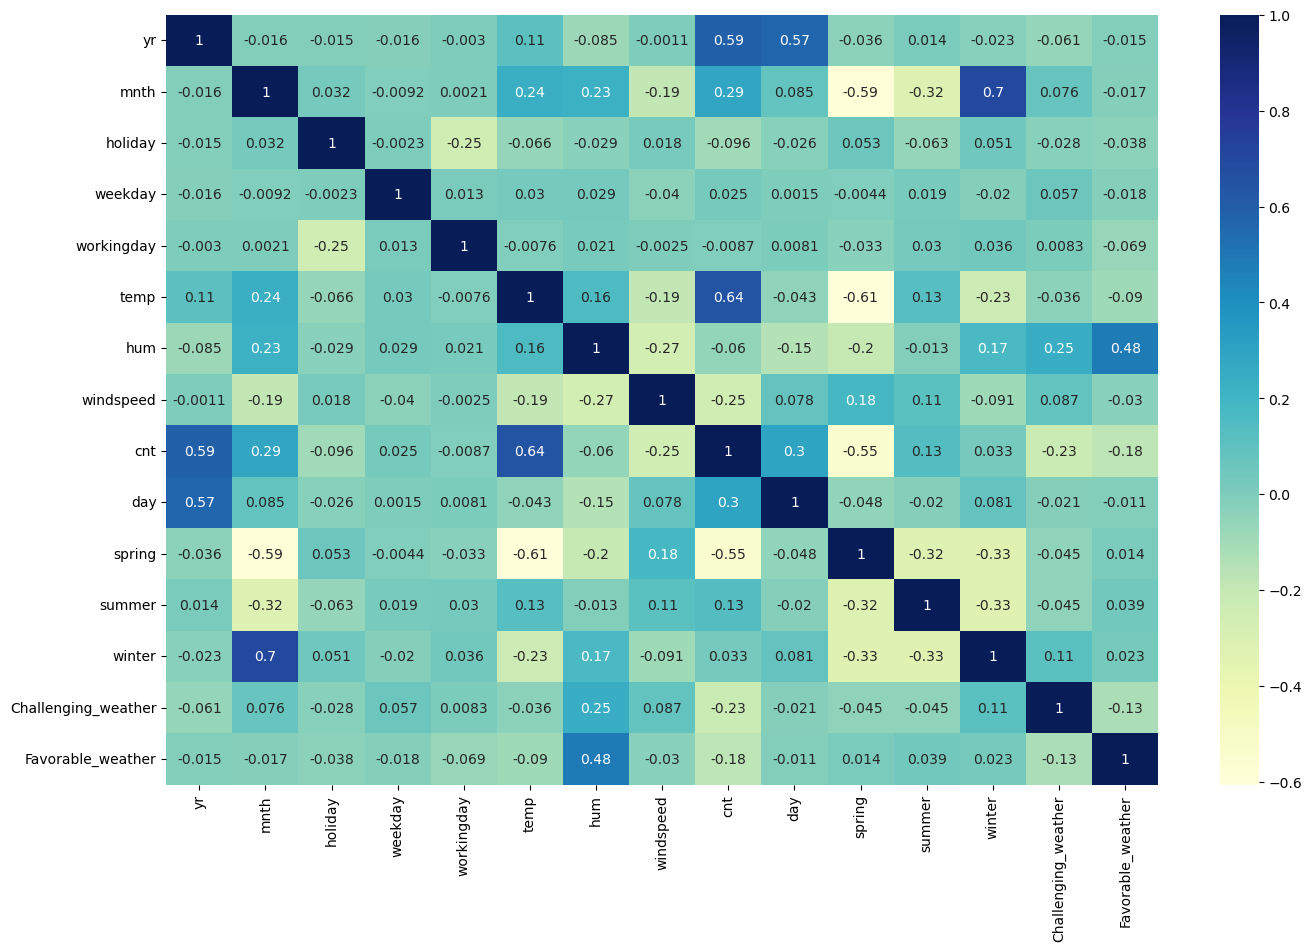

In [135]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

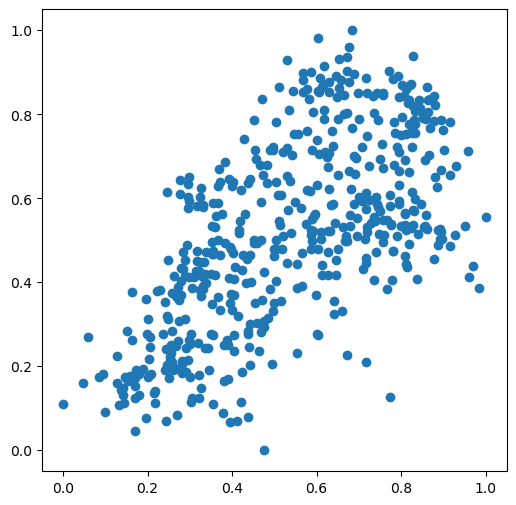

In [136]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [137]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [138]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 5),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Challenging_weather', True, 1),
 ('Favorable_weather', True, 1)]

In [141]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Challenging_weather', 'Favorable_weather'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'day'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [143]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [144]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [145]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [146]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          4.78e-183
Time:                        13:01:58   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2925    

In [147]:
X_train_vf = X_train_rfe.drop(['const'],axis=1)

In [148]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vf
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.02
2,temp,14.79
4,windspeed,4.64
5,spring,3.71
7,winter,3.05
9,Favorable_weather,2.28
6,summer,2.24
0,yr,2.07
8,Challenging_weather,1.24
1,holiday,1.04


In [149]:
# very high correlation - hum , hence dropping.
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [150]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Challenging_weather', 'Favorable_weather'],
      dtype='object')

In [151]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [152]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [153]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.42e-181
Time:                        13:01:58   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2223    

In [154]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [155]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,yr,2.07
4,spring,1.96
5,summer,1.79
6,winter,1.62
8,Favorable_weather,1.52
7,Challenging_weather,1.08
1,holiday,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [156]:
y_train_cnt = lm.predict(X_train_lm)

In [157]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

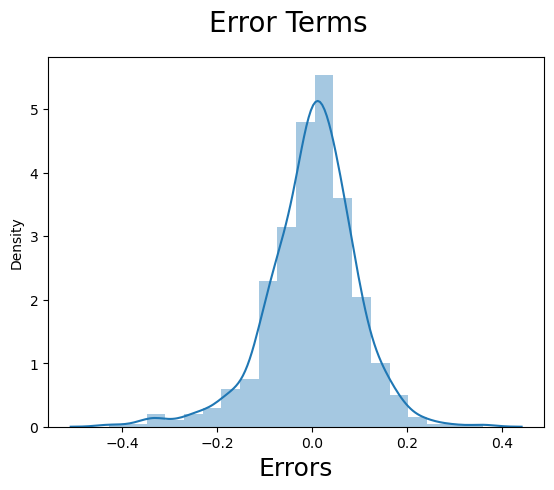

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Looking for patterns in the residuals

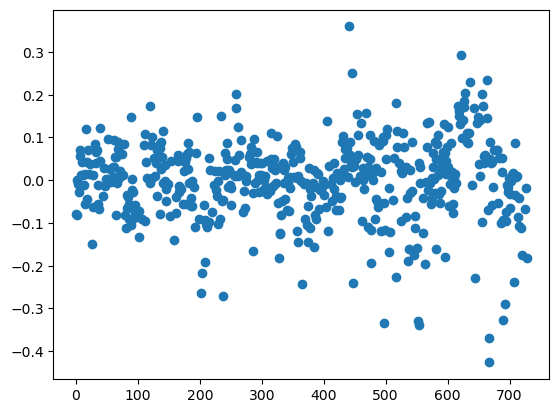

In [159]:
plt.scatter(X_train.index,res)
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [160]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt','day']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [161]:
y_test = df_test.pop('cnt')
X_test = df_test

In [162]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [163]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

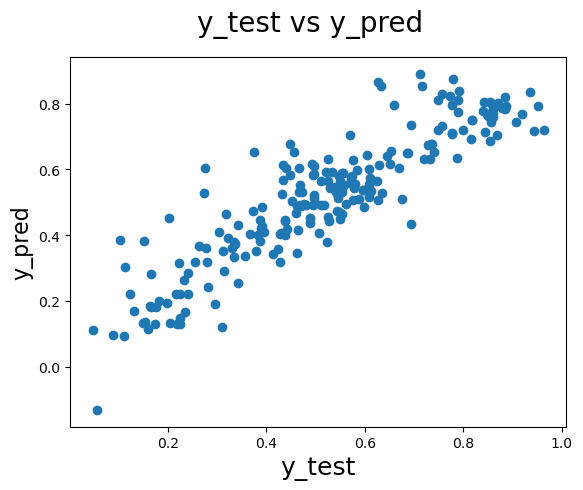

In [164]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt = 0.234  \times  yr - 0.0877  \times  holiday + 0.4667 \times temp - 0.1546 \times windspeed - 0.0824 \times spring + 0.0371 \times summer + 0.0760 \times winter - 0.2794 \times Challenging\_weather - 0.0763 \times Favorable\_weather $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features 
2. Build a non-linear model

Top 3 features can be concluded as :

1. temp
2. yr
3. Challenging_weather